In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.DataFrame({
    "a": [1,2,3], "b": [4,5,6], "c": [7,8,9]}, index=[1,2,3])
df

,a,b,c
1,1,4,7
2,2,5,8
3,3,6,9


In [10]:
df.loc[:,['b','c']]

,b,c
1,4,7
2,5,8
3,6,9


In [4]:
df = pd.DataFrame({
    "a": [1,2,3], "b": [4,5,6], "c": [7,8,9]}, index=pd.MultiIndex.from_tuples(
        [('d',1),('d',2),('e',2)], names = ['x1', 'x2']))
df

a  b  c
x1 x2         
d  1   1  4  7
   2   2  5  8
e  2   3  6  9

In [11]:
tipsData = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [12]:
tipsData

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
tipsData.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
tipsData.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
tipsData.groupby(['day']).count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [16]:
tipsData.groupby(['day']).sum()

,total_bill,tip,size
day,,,
Fri,325.88,51.96,40
Sat,1778.40,260.40,219
Sun,1627.16,247.39,216
Thur,1096.33,171.83,152


In [17]:
tipsData.groupby(['day']).sum()['tip']

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [18]:
tipdaypercentage = tipsData.groupby(['day']).sum()['tip']/tipsData.groupby(['day']).sum()['total_bill']*100
tipdaypercentage

day
Fri     15.944519
Sat     14.642375
Sun     15.203791
Thur    15.673201
dtype: float64

In [19]:
tipdaypercentage = tipdaypercentage.to_frame('tips (%)')
tipdaypercentage.reset_index(inplace=True)


In [20]:
tipdaypercentage

,day,tips (%)
0,Fri,15.944519
1,Sat,14.642375
2,Sun,15.203791
3,Thur,15.673201


In [21]:
type(tipdaypercentage)

pandas.core.frame.DataFrame

<AxesSubplot:title={'center':'%Tips Per Day'}, xlabel='Day', ylabel='Percentage %'>

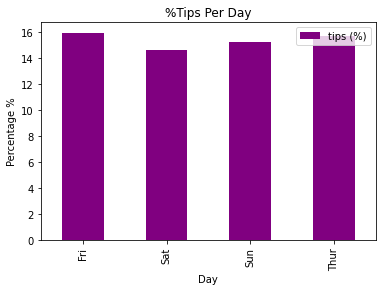

In [24]:
fig, ax = plt.subplots()
tipdaypercentage.plot(kind='bar', x='day', y='tips (%)', ax = ax, color='purple', title='%Tips Per Day', ylabel='Percentage %', xlabel='Day')

In [25]:
day_count = pd.DataFrame(tipsData['day'].value_counts()).reset_index()
day_count.columns = ['day', 'count']

In [26]:
day_count

,day,count
0,Sat,87
1,Sun,76
2,Thur,62
3,Fri,19


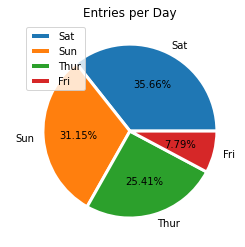

In [44]:
fig, ax = plt.subplots()
day_count.plot(kind='pie', y='count',labels=day_count['day'], ax=ax, autopct='%1.2f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
ax.set_title('Entries per Day')
ax.legend(loc='upper left')
ax.yaxis.label.set_color('white')



In [37]:
tipsData['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

array([<AxesSubplot:title={'center':'total_bill'}>], dtype=object)

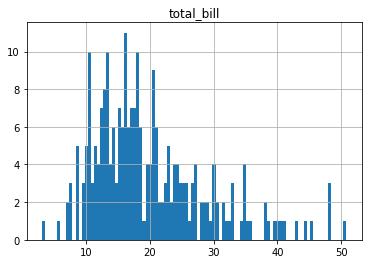

In [38]:
fig, ax = plt.subplots()
tipsData.hist(column='total_bill', ax=ax, bins=100)

In [46]:
import numpy as np

In [47]:
pd.pivot_table(tipsData, index=['sex', 'smoker'], aggfunc=[np.sum,np.mean])

sum                         mean                     
              size     tip total_bill      size       tip total_bill
sex    smoker                                                       
Female No      140  149.77     977.68  2.592593  2.773519  18.105185
       Yes      74   96.74     593.27  2.242424  2.931515  17.977879
Male   No      263  302.00    1919.75  2.711340  3.113402  19.791237
       Yes     150  183.07    1337.07  2.500000  3.051167  22.284500